# QExpy Introduction
1. Install QExpy on Colab using pip
2. A few examples from https://qexpy.readthedocs.io/en/latest/intro.html

In [1]:
!pip install qexpy

     |████████████████████████████████| 51kB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/3e/1d/4d023bf95295aa85f305efbffa4c02f7513dd75e87e8447811
Successfully built qexpy


In [2]:
from bokeh.io import output_notebook
output_notebook()

#import the module
import qexpy as q
#declare 2 Measurements, x and y
x = q.Measurement(10,1)
y = q.Measurement(5,3)
#define a quantity that depends on x and y:
z = (x+y)/(x-y)
#print z, with the correct error
print(z)

Loading BokehJS ...

Loading BokehJS ...

3 +/- 2


In [3]:
output_notebook()
# There are several ways to produce a Plot object from a set of data.
# Here, we pass the data directly to the plot object:
q.plot_engine='bokeh'
fig1 = q.MakePlot(xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  ydata = [0.9, 1.4, 2.5, 4.2, 5.7, 6., 7.3, 7.1, 8.9, 10.8],
                  yerr = 0.5,
                  xname = 'length', xunits='m',
                  yname = 'force', yunits='N',
                  data_name = 'mydata')
# We can now fit the data, and display a plot (optionally) showing the residuals
fig1.fit("linear")
fig1.add_residuals()
fig1.show()

Loading BokehJS ...

-----------------Fit results-------------------
Fit of  mydata  to  linear
Fit parameters:
mydata_linear_fit0_fitpars_intercept = -0.3 +/- 0.4,
mydata_linear_fit0_fitpars_slope = 1.06 +/- 0.06

Correlation matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 9.76/7
---------------End fit results----------------



In [4]:
# This produces two sets of data which should be fit to a line with a
# slope of 3 and an intercept 2
output_notebook()
figure = q.MakePlot([1, 2, 3, 4, 5], [5, 7, 11, 14, 17], xerr=0.5, yerr=1)
figure.show()

Loading BokehJS ...

# Examples from the manuscript  "QExpy: A Python-3 module to support undergraduate physics laboratories"
## Example 1: Propagation of Uncertainties and Correlations

In [7]:
output_notebook()

#Set the significant digits to 2 based upon the uncertainties
q.set_sigfigs(2)

#Create two measurement objects based on the best estimate and uncertainty
x = q.Measurement(10, 1) #10 +/- 1
y = q.Measurement(4.5, 0.4) #4.5 +/- 0.4

#Sum  of x and y with no correlation
print("x+y (uncorrelated):", x+y)

#If x is positively correlated with y, the uncertainty in the sum goes up
x.set_correlation(y, 0.5)

#Sum  of x and y with correlation
print("x+y (correlated):", x+y)

#If x is negatively correlated with y, the uncertainty in the sum goes down
x.set_correlation(y, -0.5)

#Sum  of x and y with correlation
print("x+y (anti-correlated):", x+y)

#Check that the variable is correctly correlated with itself
print("x**2 - x*x:", x**2-x*x)

Loading BokehJS ...

x+y (uncorrelated): 14.5 +/- 1.1
x+y (correlated): 14.5 +/- 1.2
x+y (anti-correlated): 14.50 +/- 0.87
x**2 - x*x: 0.0 +/- 0.0


## Example 2: Comparison of derivative and Monte Carlo methods

The value of x is x= 10.4 +/- 2.0
The value of F with derivative errors is F = 11.3 +/- 1.9
The value of F with MC errors is F = 11.4 +/- 1.9


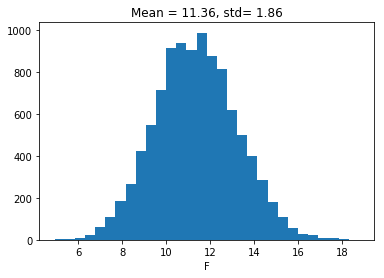

In [12]:
#imports for calculating mean and std. dev.
import matplotlib.pyplot as plt
import numpy as np

#Set the sig figs to 2
q.set_sigfigs(2)
#Create two measurements with a list of x
x = q.Measurement([7.2, 9, 10, 11, 12, 14, 10.5, 9.5])
print("The value of x is x=", x)
#Create y as a best estimate and uncertainty
y = q.Measurement(4.5, 0.4)

#Create a function of x and y
F = q.sqrt(x**2 + y**2)

#Print the values of F
q.set_error_method("derivative")
print ("The value of F with derivative errors is F =", F)

#Let's also use Monte Carlo errors
q.set_error_method("MC")
print("The value of F with MC errors is F =", F)

plt.hist(F.MC_list, bins=30)
plt.xlabel('F')
plt.title('Mean = {:.2f}, std= {:.2f}'.format(np.mean(F.MC_list), np.std(F.MC_list)))
plt.show()

## Example 3: Plotting and fitting to a straight line

-----------------Fit results-------------------
Fit of  Spring measurements  to  linear
Fit parameters:
Spring measurements_linear_fit0_fitpars_intercept = -1.74 +/- 0.96,
Spring measurements_linear_fit0_fitpars_slope = 2.43 +/- 0.21

Correlation matrix: 
[[ 1.    -0.894]
 [-0.894  1.   ]]

chi2/ndof = 6.40/4
---------------End fit results----------------



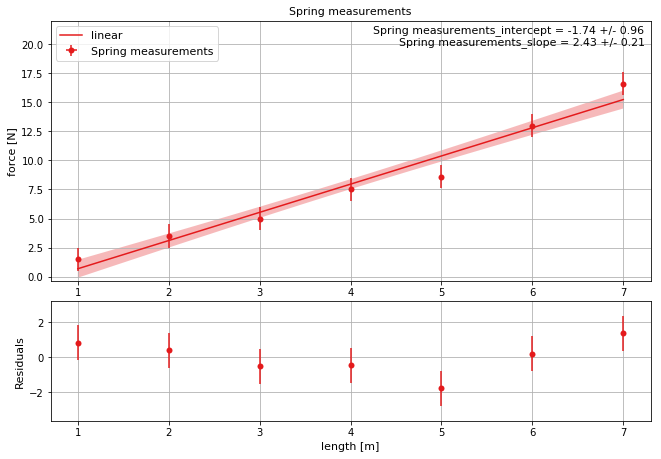

In [15]:
#Choose the matplotlib engine
q.plot_engine='mpl'

#Make use of the measurement arrays to specify data points with no uncertainty
xdata=q.MeasurementArray([1, 2, 3, 4, 5, 6, 7], error=[0], name='length', units='m')
#Set up ydata array with same uncertainty in all measurements
ydata=q.MeasurementArray([1.5, 3.5, 5.0, 7.5, 8.6, 13, 16.6], error=[1.0], name='force', units='N')

#Set up plot
fig = q.MakePlot(xdata, ydata, data_name='Spring measurements')
#Fit to a line
fig.fit('linear')
#Show the fit residuals
fig.add_residuals()
#Show the figure
fig.show()

## Example 4: Fitting to a custom function

-----------------Fit results-------------------
Fit of  spring potential energy  to  custom
Fit parameters:
spring potential energy_custom_fit0_fitpars_par0 = 0.00071 +/- 0.00030,
spring potential energy_custom_fit0_fitpars_par1 = 2.19 +/- 0.23

Correlation matrix: 
[[ 1.    -0.995]
 [-0.995  1.   ]]

chi2/ndof = 1022.46/4
---------------End fit results----------------



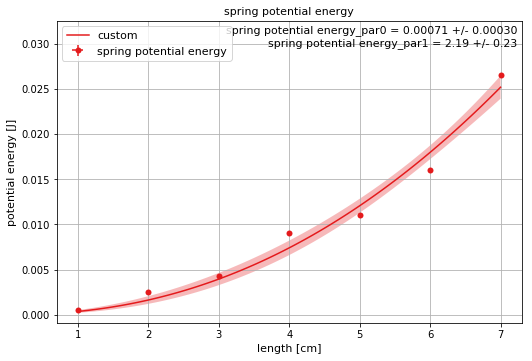

In [23]:
# Define a fit function
def model(x, *par):
  return par[0]*0.5*x**par[1]

xyData = q.XYDataSet(xdata=[1, 2, 3, 4, 5, 6, 7], xerr=[0], xname='length', xunits='cm',
                     ydata=[5.1e-4, 2.5e-3, 4.3e-3, 9e-3, 1.1e-2, 1.6e-2, 2.65e-2], yerr=[1e-4], yname='potential energy', yunits='J',
                     data_name='spring potential energy')
#results = xyData.fit(model, parguess= [1,1])
#print('Fit parameters:', results)

xyData.fit(model, parguess=[1,1])
#Set up plot
fig = q.MakePlot(xyData)
#Show the figure
fig.show()

In [0]:
#output_notebook()
import numpy as np
mu = 9.274e-24
k = 1.381e-23
T0 = 0.1
T1 = 300
T2 = 1500

def func(x, *pars):
    return np.tanh(mu*x/k/pars[0])

figure = q.MakePlot(xname = 'Magnetic Field', xunits='T',
                    yname = 'Magnetization', yunits='')

# This function is not related to any data.
figure.add_function(func, name="T0", pars = [T0],
               color = 'blue', x_range =[-2500,2500])
figure.add_function(func, name="T1", pars = [T1],
               color = 'green', x_range =[-2500,2500])
figure.add_function(func, name="T2", pars = [T2],
               color = 'red', x_range =[-2500,2500])

figure.show()

Loading BokehJS ...